# White and Black Image


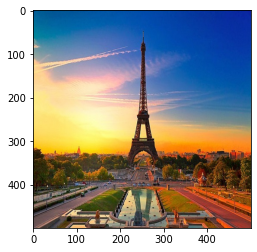

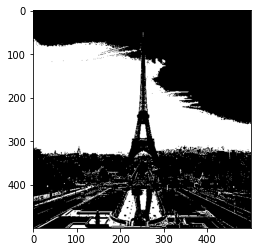

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps
img = Image.open('photo.jpg')
plt.imshow(img)
plt.show()

pixel=list(img.getdata())
w,h=img.size
k=0
for i in range(w):
    for j in range(h):
        #print(pixel_values[i][j])
        a=pixel[k]
        r,g,b=a;
        sum=int((r+g+b)/3)
        #print(sum)
        if(sum>127):
            pix=(255,255,255)
        else:
            pix=(0,0,0)
        #pix=(sum,sum,sum)
        pixel[k]=pix
        k=k+1
#pixel


new_img = Image.new('RGB', (w, h))
new_img.putdata(pixel)
plt.imshow(new_img)
plt.show()

# Image Border

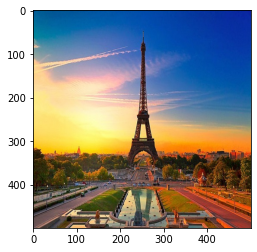

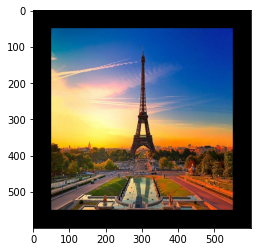

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps 
img = Image.open('photo.jpg')
plt.imshow(img)
plt.show()


border_size = 50
bordered_image = ImageOps.expand(img, border=border_size, fill='black')
# Save the new image file
#bordered_image.save("example_image_bordered.png")
plt.imshow(bordered_image)
plt.show()

# Border no function

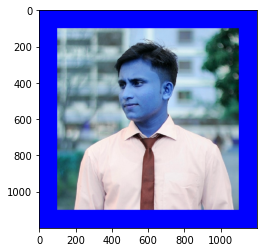

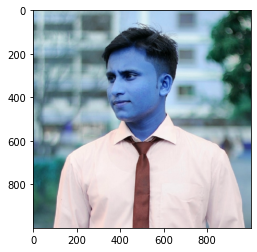

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_border(image_path, border_size, border_color):
    # Load the image
    image = cv2.imread("shamim.jpg")

    # Determine the dimensions of the new image with the border
    height, width = image.shape[:2]
    new_height = height + 2 * border_size
    new_width = width + 2 * border_size

    # Create a new image with the border
    border_image = np.zeros((new_height, new_width, 3), np.uint8)
    border_image[:, :] = border_color

    # Paste the original image in the center of the border image
    border_image[border_size:border_size + height, border_size:border_size + width] = image

    return border_image

# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Set the border size (in pixels) and the border color (BGR format)
border_size = 100
border_color = (0, 0, 255)  # Red border

# Add the border to the image
border_image = add_border(image_path, border_size, border_color)

# Display the original image and the image with the border
image = cv2.imread("shamim.jpg")
plt.imshow(border_image)
plt.show()
plt.imshow(image)
plt.show()


# Gray Image

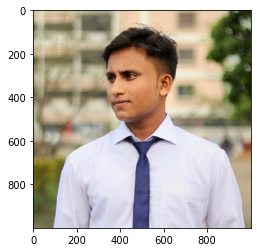

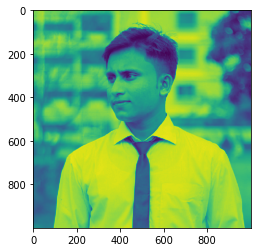

In [65]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
img = Image.open('shamim.jpg')
plt.imshow(img)
plt.show()
pixel_values=list(img.getdata())


w,h=img.size
k=0
gray=[]
for i in range(w):
    for j in range(h):
        r,g,b=pixel_values[k]
        value=0.2989 * r + 0.5870 * g + 0.1140 * b
        gray.append(int(round(value,0)))
        #print(round(value,0))
        k=k+1
two_gray = [gray[i:i+w] for i in range(0, w*h, w)]
        
gray_image = list(two_gray)
gray_image
plt.imshow(gray_image)
plt.show()

# Using Function

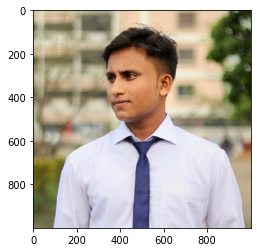

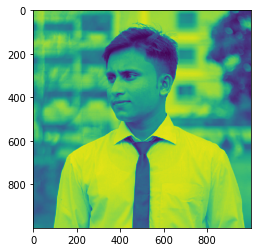

In [66]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
img = Image.open('shamim.jpg')
plt.imshow(img)
plt.show()
pixel_values=np.copy(img)
gray_image = img.convert("L")
w,h=gray_image.size
plt.imshow(gray_image)
plt.show()

# Diagonal sum put into centre



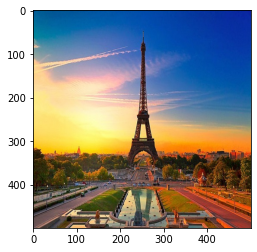

In [38]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
img = Image.open('photo.jpg')
plt.imshow(img)
plt.show()
pixel_values=list(img.getdata())
#pixel_values=np.copy(gray_image)
# pixel_values

500 500
70


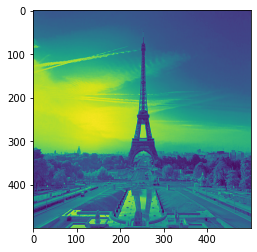

In [39]:
w,h=img.size
print(w,h)
k=0
gray=[]
for i in range(w):
    for j in range(h):
        r,g,b=pixel_values[k]
        value=0.2989 * r + 0.5870 * g + 0.1140 * b
        gray.append(int(round(value,0)))
        k=k+1
two_gray = [gray[i:i+w] for i in range(0, w*h, w)]
        
gray_image = list(two_gray)
print((gray_image[2][6]))
plt.imshow(gray_image)
plt.show()

500 500


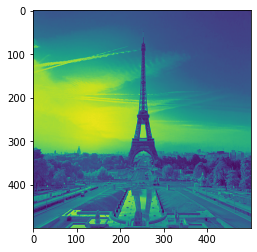

In [40]:
# pixel_values=gray_image.getdata()
# print(pixel_values)
h,w=img.size
print(h,w)
sum=0
for i in range(h):
    sum=sum+gray_image[i][i]
for i in range(w):
    sum=sum+gray_image[0][w-i-1]
i=int(w/2-1)
if(sum>255):
    gray_image[i][i]=255
else:
    gray_image[i][i]=sum
      


plt.imshow(gray_image)
plt.show()
#new=list(new_img.getdata())
#new


# Find the centre value

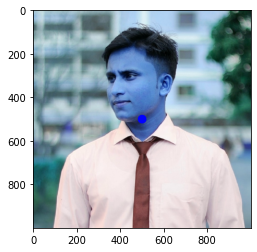

In [41]:
import cv2
import matplotlib.pyplot as plt
def find_center_point(image):
    # Calculate the center coordinates
    height, width = image.shape[:2]
    center_x = int(width / 2)
    center_y = int(height / 2)

    return center_x, center_y

# Load the image
image = cv2.imread("shamim.jpg")

# Find the center point
center_x, center_y = find_center_point(image)

# Draw a circle at the center point
radius = 20
color = (0, 0, 255)  # Red color (BGR format)
thickness = -5  # Fill the circle
cv2.circle(image, (center_x, center_y), radius, color, thickness)

# Display the image with the center point
plt.imshow( image)
plt.show()



# Histogram

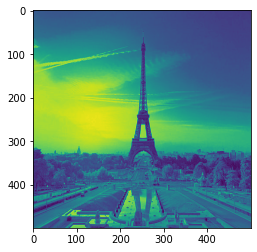

<BarContainer object of 256 artists>

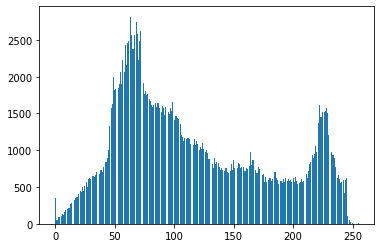

In [42]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import numpy as np
img = Image.open('gray_img.jpg')
plt.imshow(img)
plt.show()
pixel_values2=list(img.getdata())
#pixel_values=np.copy(gray_image)
#pixel_values2
pixel_values=np.copy(img)
gray_scale = np.zeros(pixel_values.max()+1)
#pixel_values




w,h=pixel_values.shape
gray_array = np.array(img)
#print(gray_array)
gray_histogram = [0] * 256
#print(gray_histogram)
for i in range(w):
    for j in range(h):
        pixel_value = gray_array[i,j]
        gray_histogram[pixel_value] += 1


        
        
        
plt.bar(range(len(gray_histogram)),gray_histogram)

# Histogram Equalization

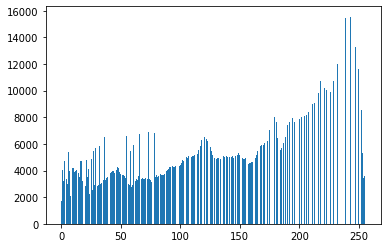

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

# probability of gray level
def bit_prk(h):
    return h / np.sum(h)

# cumulative distribution function
def prk_cdf(prk):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(prk[:i+1])
    return cdf

# histogram equalization
def hist_equalization(cdf, nrk):
    hist_equalization_bit = np.round(cdf * 255).astype(np.uint8)
    hist_nrk = np.zeros(256)
    for i in range(256):
        hist_nrk[hist_equalization_bit[i]] += nrk[i]
    return hist_nrk


def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('shamim.jpg')
nrk = gray_level_histrogram(gray_image(img))
prk = bit_prk(nrk)
cdf = prk_cdf(prk)
new_img = hist_equalization(cdf, nrk)

plot_histrogram(new_img)

# Using function Histogram Equalization

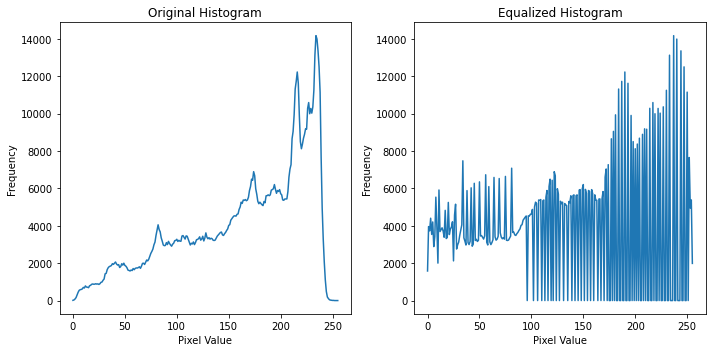

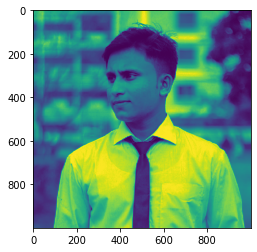

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path):
    # Load the image
    image = cv2.imread("shamim.jpg", 0)  # Read the image in grayscale mode (0)

    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(image)

    # Calculate histograms
    hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

    # Plot the histograms
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(hist_original)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.plot(hist_equalized)
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return equalized_image

# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Perform histogram equalization and display histograms
equalized_image = histogram_equalization(image_path)

# Display the original and equalized images
plt.imshow(equalized_image)
plt.show()


# Add two image

211
73
255


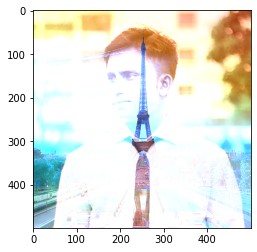

In [45]:
import cv2
import numpy as np
img1 = cv2.imread('shamim.jpg')
img2 = cv2.imread('photo.jpg')

# Add the images
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
result = cv2.add(img1, img2)
print(img1[0][0][1])
print(img2[0][0][1])
print(result[0][0][1])
plt.imshow(result)
plt.show()


# Substract Two image

(1000, 1000, 3)
(500, 500, 3)


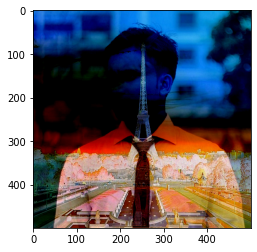

218
0
218


In [46]:
import cv2
import numpy as np
img1 = cv2.imread('shamim.jpg')
img2 = cv2.imread('photo.jpg')
print(img1.shape)
print(img2.shape)
# Add the images
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
result = cv2.subtract(img1, img2)
plt.imshow(result)
plt.show()
print(img1[0][0][2])
print(img2[0][0][2])
print(result[0][0][2])

# Point , Line and Edge Detection

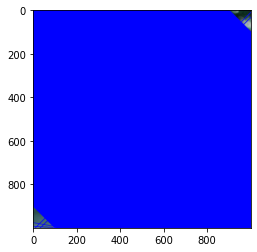

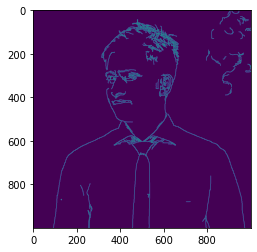

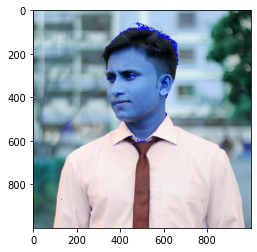

In [47]:
import cv2
import numpy as np

def detect_lines(image_path):
    # Load the image
    image = cv2.imread("shamim.jpg")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(gray, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    # Draw the lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the image with detected lines
    plt.imshow( image)
    plt.show()


def detect_edges(image_path):
    # Load the image
    image = cv2.imread("shamim.jpg")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Display the image with detected edges
    plt.imshow( edges)
    plt.show()


def detect_corners(image_path):
    # Load the image
    image = cv2.imread("shamim.jpg")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect corners using the Harris corner detector
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Mark the corners on the image
    corners = cv2.dilate(corners, None)
    image[corners > 0.01 * corners.max()] = [0, 0, 255]

    # Display the image with detected corners
    plt.imshow( image)
    plt.show()


# Provide the path to your image file
image_path = "path_to_your_image.jpg"

# Detect lines in the image
detect_lines(image_path)

# Detect edges in the image
detect_edges(image_path)

# Detect corners in the image
detect_corners(image_path)


# Morphological Operation

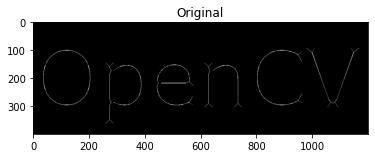

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('opencv.png', 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.show()

Text(0.5, 1.0, 'Closing')

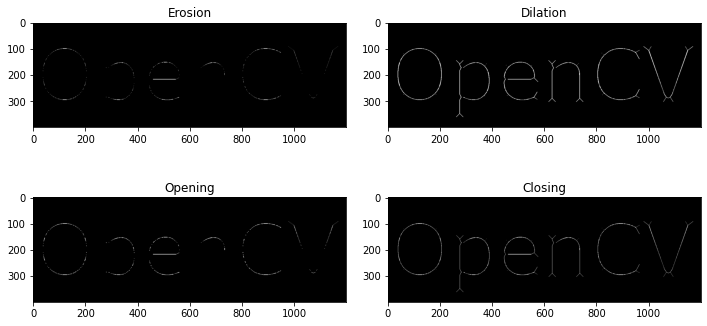

In [49]:
kernel = np.ones((1,2), np.uint8)
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()


# erosion
erosion = cv2.erode(image, kernel, iterations = 1)
axs[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Erosion')
#cv2.imwrite('erosion.png', erosion)

# dialate
dilation = cv2.dilate(image, kernel, iterations = 1)
axs[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Dilation')
#cv2.imwrite('dilation.png', dilation)

# Opening 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
axs[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('Opening')
#cv2.imwrite('opening.png', opening)

# Closing 
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
axs[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('Closing')
#cv2.imwrite('closing.png', closing)

# Morphological Image processing

In [50]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('05.png')
gray_image = np.mean(img, axis=-1).astype(np.uint8)
# binary_image = (gray_image > 127).astype(np.uint8)



In [51]:
# Erosion
def erosion(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.max(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [52]:
# dilation
def dilation(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    new_img = np.zeros((img_height - kernel_height + 1, img_width - kernel_width + 1))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = np.min(img[i:i + kernel_height, j:j + kernel_width] * kernel)
    return new_img.astype(np.uint8)

In [53]:
# create subplot to show gray image, erosion and dilation
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(erosion(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Erosion')
    axs[2].imshow(dilation(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Dilation')
    plt.show()
    

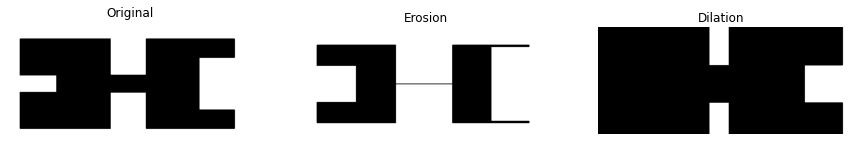

In [54]:
kernel = np.ones((47, 47))
show_image(gray_image, kernel)

In [55]:
# Opening
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

# Closing
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)


# create subplot to show gray image, opening and closing
def show_image(img, kernel):
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(img, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(opening(img, kernel), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Opening')
    axs[2].imshow(closing(img, kernel), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Closing')
    plt.show()

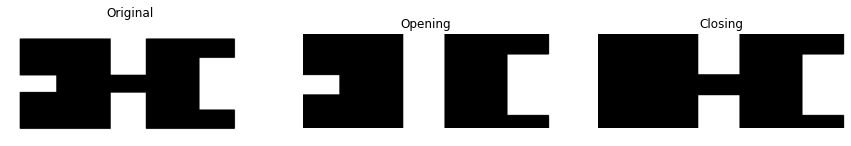

In [56]:
kernel = np.ones((50, 50))
show_image(gray_image, kernel)

# Line Detection


In [57]:
def add_padding(img, padding_size, color=0):
    """
    :param img: numpy array
    :param padding_size: int
    :param color: int
        :size 1: gray image 0-255
        :size 3: RGB image (0, 0, 0) - (255, 255, 255)
    :return: numpy array
    """
    # Gray image
    if len(img.shape) == 2:
        img_height, img_width = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    # RGB image
    elif len(img.shape) == 3:
        img_height, img_width, img_channel = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2, img_channel), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    return padded_img.astype(np.uint8)

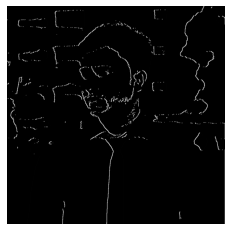

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# line detection using sobel filter
def sobel_filter(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])
    return new_img.astype(np.uint8)

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('shamim.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
line_img = sobel_filter(bin_img)


show_image(line_img)

# Edge detection

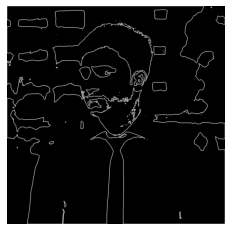

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# edge detection 
def edge_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
    sobel_filter_y = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.sqrt(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3])**2 + np.sum(sobel_filter_y * padded_img[i:i + 3, j:j + 3])**2)
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    
img = plt.imread('shamim.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
edge_img = edge_detection(bin_img)

show_image(edge_img)

# Point Detection

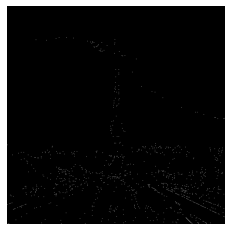

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

# gray scale image to binary image using thresholding(127)
def binary_image(img):
    return (img > 127).astype(np.uint8)


# point detection
def point_detection(img):
    # add padding to image
    padded_img = add_padding(img, 1)
    # sobel filter
    sobel_filter_x = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    sobel_filter_y = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, 1]])
    # convolution
    img_height, img_width = padded_img.shape
    new_img = np.zeros((img_height - 2, img_width - 2))
    for i in range(img_height - 2):
        for j in range(img_width - 2):
            new_img[i, j] = np.abs(np.sum(sobel_filter_x * padded_img[i:i + 3, j:j + 3]))
    threshold = np.max(new_img) * 0.8
    new_img[new_img < threshold] = 0
    new_img[new_img >= threshold] = 255
    return new_img.astype(np.uint8)


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = plt.imread('photo.jpg')
gray_img = gray_image(img)
bin_img = binary_image(gray_img)
point_img = point_detection(bin_img)

show_image(point_img)